## IMPORTING REQUIRED LIBS AND
# READING DATA

In [100]:
import numpy as np
import gzip
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models


train_images = r"E:\OCR\dataset\train\train-images-idx3-ubyte.gz"
train_label = r"E:\OCR\dataset\train\train-labels-idx1-ubyte.gz"
test_images = r"E:\OCR\dataset\test\t10k-images-idx3-ubyte.gz"
test_label = r"E:\OCR\dataset\test\t10k-labels-idx1-ubyte.gz"

def read_mnist(image, labels):
    with gzip.open(labels, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(image,'rb') as imagesFile:
        length = len(labels)
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

## Normalize pixel values to be between 0 and 1

In [101]:
train_data, train_labels = read_mnist(train_images, train_label)
test_data, test_labels = read_mnist(test_images, test_label)

In [102]:

train_images = train_data.astype('float32') / 255.0
test_images = test_data.astype('float32') / 255.0


# train test split


In [103]:
train_images, val_images, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# creating a sequential model

In [104]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [105]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [106]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(val_images, val_labels))


Epoch 1/5
750/750 [==============================] - 26s 32ms/step - loss: 1.0697 - accuracy: 0.9013 - val_loss: 0.1475 - val_accuracy: 0.9582
Epoch 2/5
750/750 [==============================] - 22s 30ms/step - loss: 0.1066 - accuracy: 0.9688 - val_loss: 0.1007 - val_accuracy: 0.9726
Epoch 3/5
750/750 [==============================] - 26s 35ms/step - loss: 0.0677 - accuracy: 0.9801 - val_loss: 0.1046 - val_accuracy: 0.9730
Epoch 4/5
750/750 [==============================] - 25s 33ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0926 - val_accuracy: 0.9749
Epoch 5/5
750/750 [==============================] - 21s 28ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0949 - val_accuracy: 0.9753


In [107]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 7ms/step - loss: 0.0946 - accuracy: 0.9756
Test Accuracy: 97.56%


# VISUALISING TRAINING AND VALIDATION ACCURACY

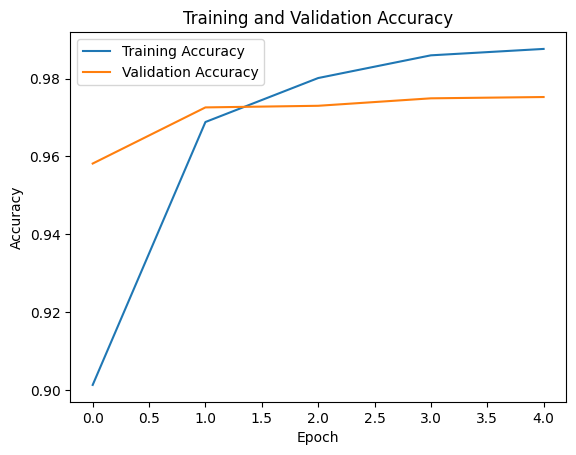

In [108]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 

# visualising Training and Validation Loss


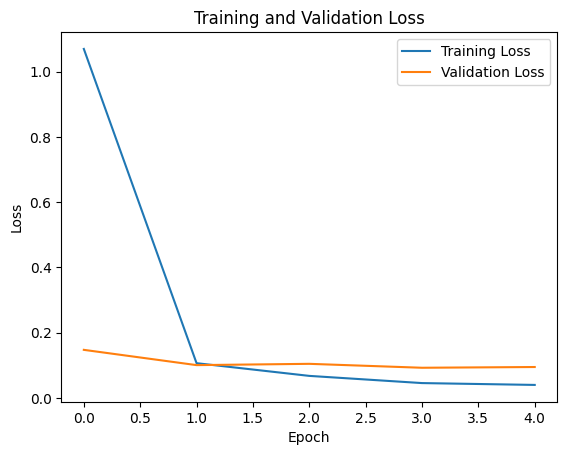

In [109]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SAVING THE MODEL

In [110]:
model.save('mnist_model.h5') 

# Using WEIGHTS from the previous model in NEW MODEL

In [111]:
loaded_model = tf.keras.models.load_model('mnist_model.h5')

In [113]:
new_model = models.Sequential()
for layer in loaded_model.layers:
    new_model.add(layer)

In [114]:
new_model.compile(optimizer=loaded_model.optimizer, loss=loaded_model.loss, metrics=['accuracy'])


In [115]:
history_new = new_model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(val_images, val_labels))


Epoch 1/5
375/375 [==============================] - 47s 70ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0774 - val_accuracy: 0.9827
Epoch 2/5
375/375 [==============================] - 21s 57ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0712 - val_accuracy: 0.9840
Epoch 3/5
375/375 [==============================] - 18s 48ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0820 - val_accuracy: 0.9821
Epoch 4/5
375/375 [==============================] - 18s 49ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0818 - val_accuracy: 0.9847
Epoch 5/5
375/375 [==============================] - 18s 47ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0781 - val_accuracy: 0.9851


In [116]:
test_loss_new, test_accuracy_new = new_model.evaluate(test_data, test_labels)
print(f"New Model Test Accuracy: {test_accuracy_new * 100:.2f}%")

313/313 [==============================] - 2s 7ms/step - loss: 0.0810 - accuracy: 0.9837
New Model Test Accuracy: 98.37%
